In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from collections import Counter
import glob
from sklearn.externals import joblib
from scipy.stats import mode
import pylab
from scipy.signal import find_peaks

/Users/nilavro/miniconda3/envs/analytics/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
data = pd.read_csv('bbdc_2019_Bewegungsdaten/train.csv')

In [3]:
data.shape

(6401, 3)

In [4]:
data.head()

,Subject,Datafile,Label
0,Subject02,Subject02/Subject02_Aufnahme000.csv,curve-left-step
1,Subject02,Subject02/Subject02_Aufnahme001.csv,curve-left-step
2,Subject02,Subject02/Subject02_Aufnahme002.csv,stand-to-sit
3,Subject02,Subject02/Subject02_Aufnahme003.csv,curve-right-spin-Rfirst
4,Subject02,Subject02/Subject02_Aufnahme004.csv,jump-one-leg


In [5]:
subjects = data['Subject'].unique()

In [6]:
subjects

array(['Subject02', 'Subject03', 'Subject04', 'Subject05', 'Subject06',
       'Subject07', 'Subject08', 'Subject09', 'Subject11', 'Subject12',
       'Subject13', 'Subject16', 'Subject17', 'Subject18', 'Subject19'],
      dtype=object)

In [6]:
valid_subs = np.random.choice(subjects, 1, replace=False)

In [7]:
data['Label'].unique()

array(['curve-left-step', 'stand-to-sit', 'curve-right-spin-Rfirst',
       'jump-one-leg', 'lateral-shuffle-right', 'curve-right-spin-Lfirst',
       'v-cut-right-Lfirst', 'stair-down', 'v-cut-left-Rfirst',
       'v-cut-right-Rfirst', 'jump-two-leg', 'sit', 'stair-up',
       'curve-right-step', 'sit-to-stand', 'run', 'v-cut-left-Lfirst',
       'stand', 'curve-left-spin-Lfirst', 'walk',
       'curve-left-spin-Rfirst', 'lateral-shuffle-left', 'lay'],
      dtype=object)

In [8]:
data['Label'].nunique()

23

In [9]:
Counter(data['Label'])

Counter({'curve-left-step': 299,
         'stand-to-sit': 289,
         'curve-right-spin-Rfirst': 300,
         'jump-one-leg': 279,
         'lateral-shuffle-right': 277,
         'curve-right-spin-Lfirst': 301,
         'v-cut-right-Lfirst': 300,
         'stair-down': 278,
         'v-cut-left-Rfirst': 280,
         'v-cut-right-Rfirst': 280,
         'jump-two-leg': 280,
         'sit': 289,
         'stair-up': 278,
         'curve-right-step': 295,
         'sit-to-stand': 289,
         'run': 300,
         'v-cut-left-Lfirst': 300,
         'stand': 289,
         'curve-left-spin-Lfirst': 280,
         'walk': 300,
         'curve-left-spin-Rfirst': 320,
         'lateral-shuffle-left': 282,
         'lay': 16})

In [10]:
timeseries = pd.read_csv('bbdc_2019_Bewegungsdaten/Subject02/Subject02_Aufnahme000.csv', header=None)

In [11]:
timeseries.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,32688,32224,32991,32609,32790,33048,37168,34610,27374,29068,29264,28408,31784,28133,29295,29244,33216,37140,34736
1,32744,32571,32935,32279,32863,33048,37168,34610,27374,29068,29264,28408,31784,28133,29295,29244,33216,37140,34736
2,32788,32934,32767,32624,32899,33048,37168,34610,27374,29068,29264,28408,31784,28133,29295,29244,33216,37140,34736
3,32828,33202,32587,32377,32783,33048,37168,34610,27374,29068,29264,28408,31784,28133,29295,29244,33216,37140,34736
4,32870,33269,32423,32954,32719,33048,37168,34610,27374,29068,29264,28408,31784,28133,29295,29244,33216,37140,34736


In [12]:
timeseries.shape

(6159, 19)

In [13]:
def file2mat(filename: str) -> np.ndarray:
    mat = genfromtxt(filename, delimiter=',')
    return mat

In [4]:
mat = file2mat('bbdc_2019_Bewegungsdaten/Subject03/Subject03_Aufnahme013.csv')

In [7]:
data[data['Label'] == 'run']

,Subject,Datafile,Label
16,Subject02,Subject02/Subject02_Aufnahme016.csv,run
48,Subject02,Subject02/Subject02_Aufnahme048.csv,run
51,Subject02,Subject02/Subject02_Aufnahme051.csv,run
67,Subject02,Subject02/Subject02_Aufnahme067.csv,run
69,Subject02,Subject02/Subject02_Aufnahme069.csv,run
74,Subject02,Subject02/Subject02_Aufnahme074.csv,run
141,Subject02,Subject02/Subject02_Aufnahme141.csv,run
148,Subject02,Subject02/Subject02_Aufnahme148.csv,run
163,Subject02,Subject02/Subject02_Aufnahme163.csv,run
184,Subject02,Subject02/Subject02_Aufnahme184.csv,run


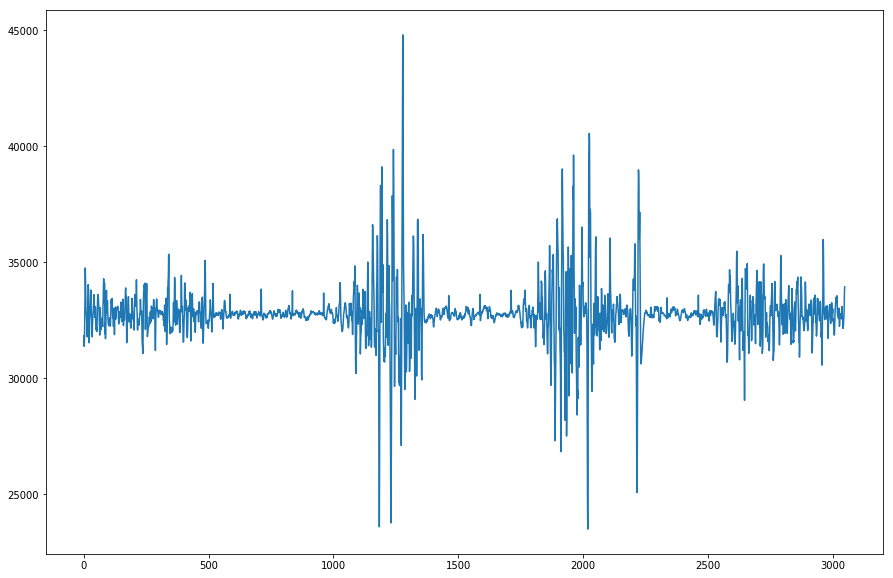

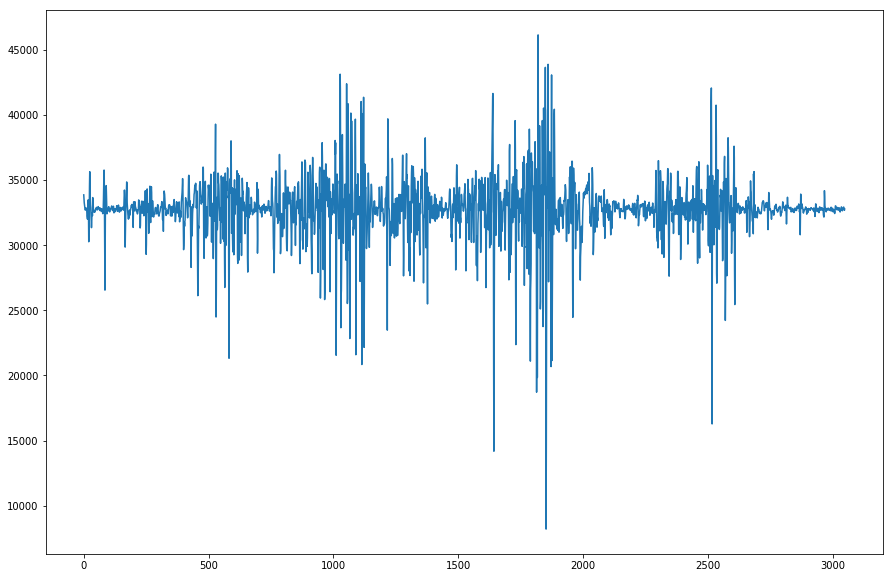

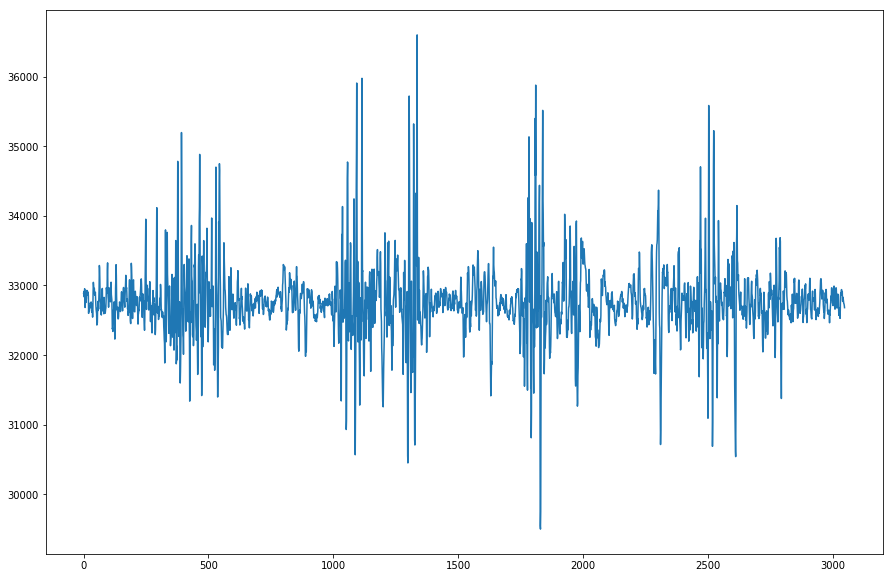

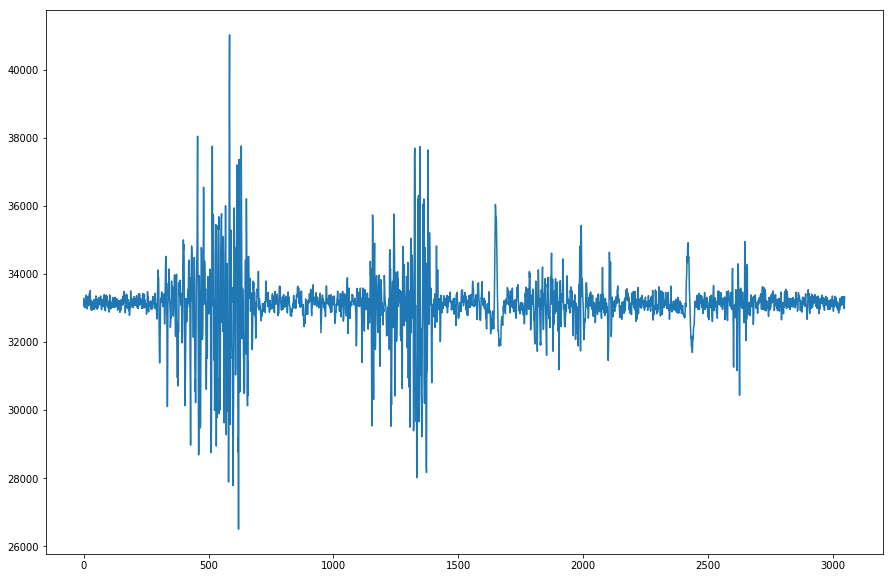

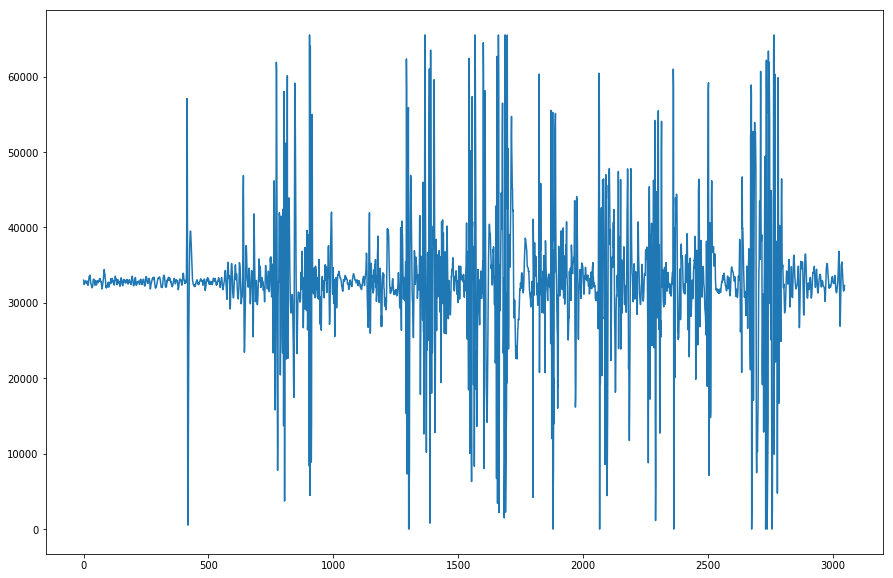

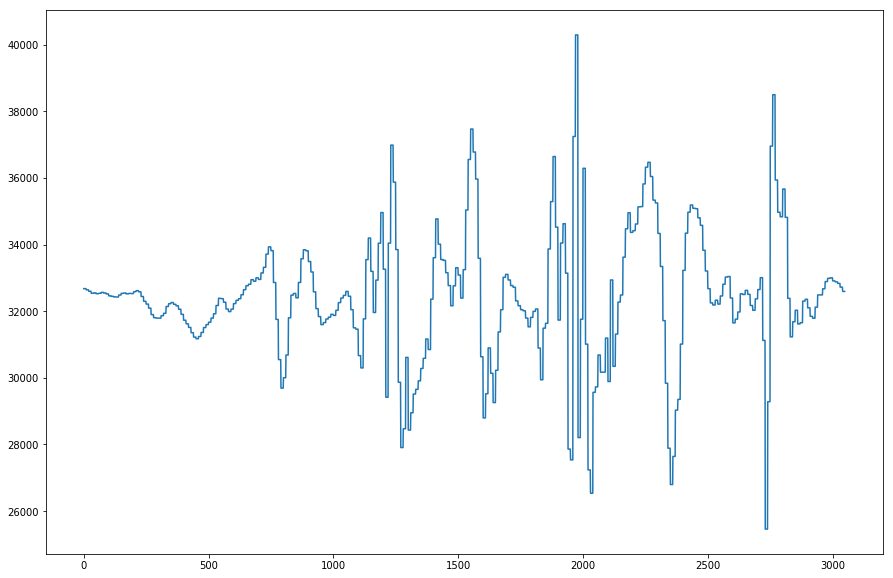

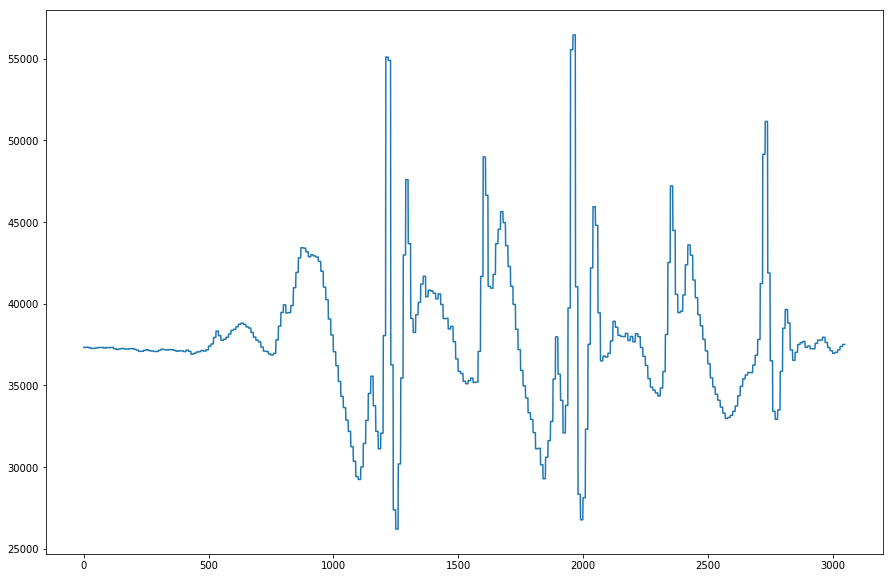

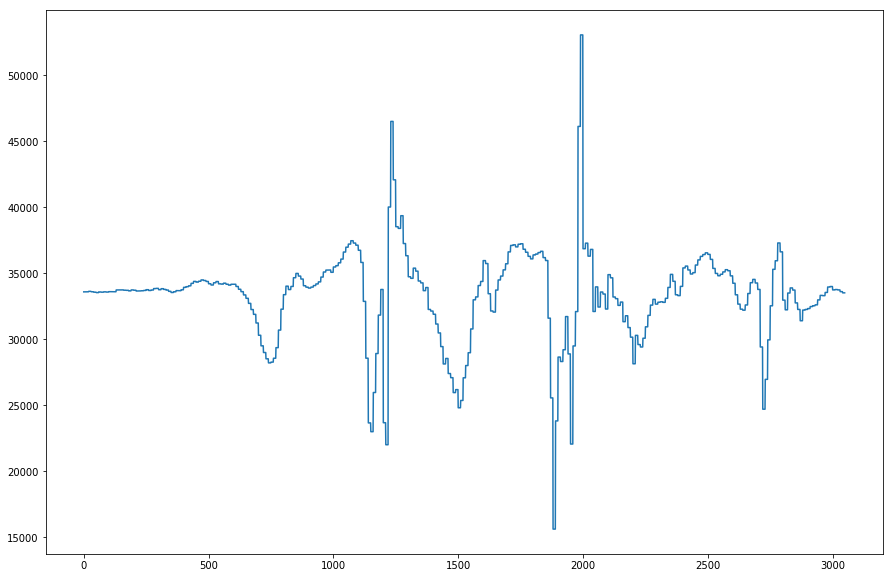

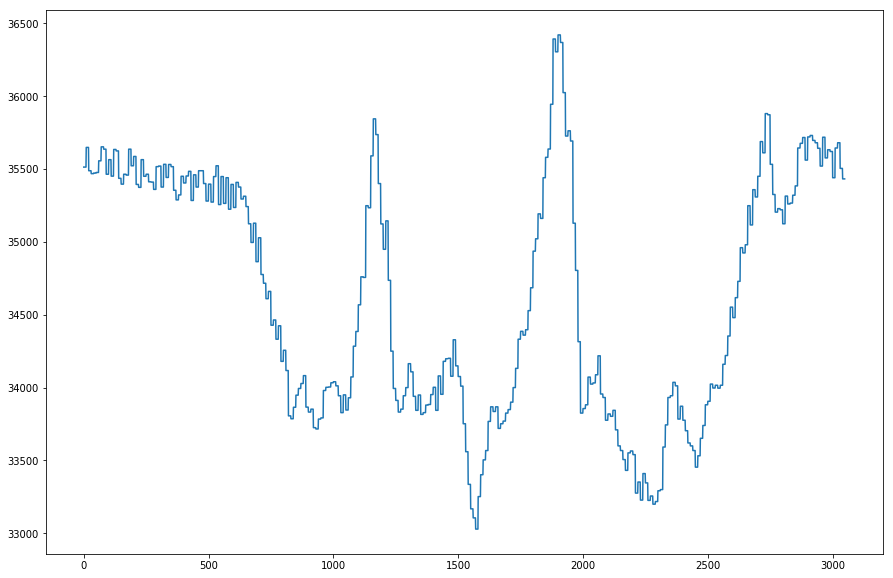

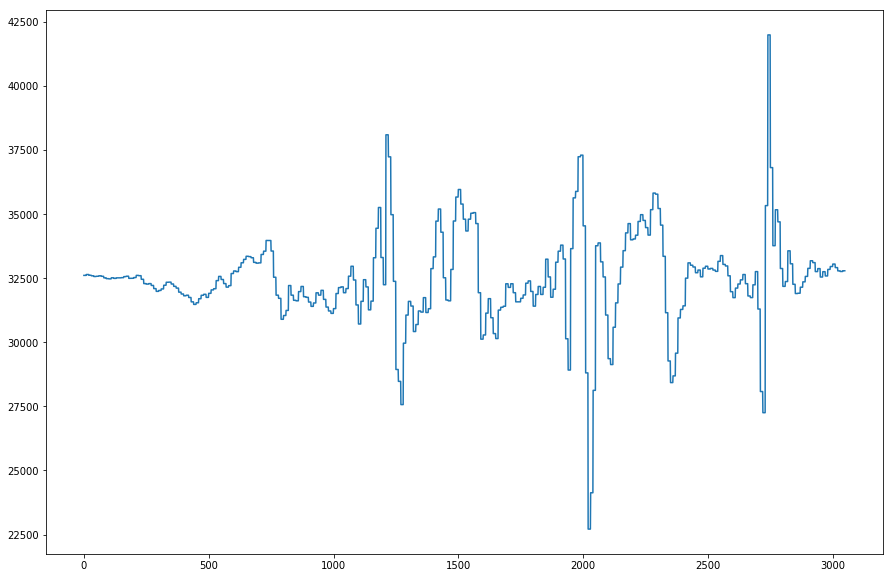

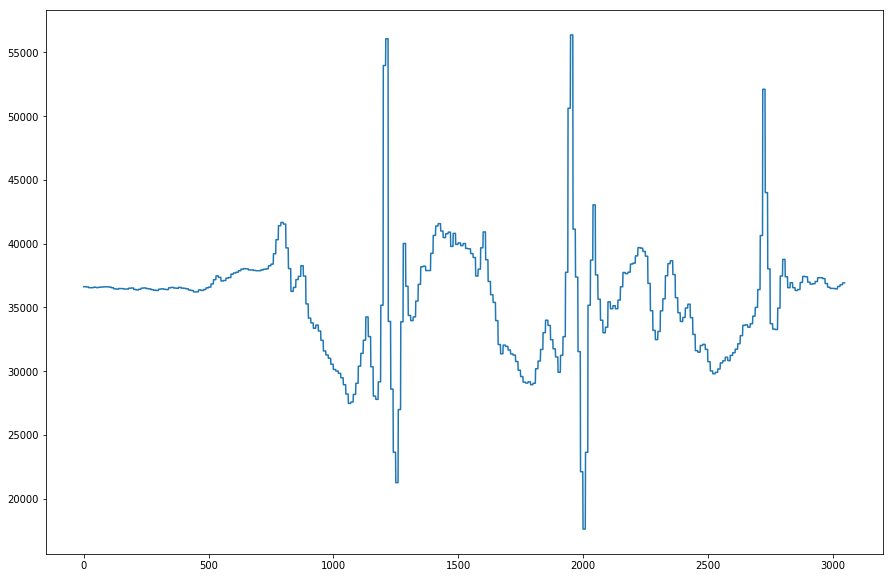

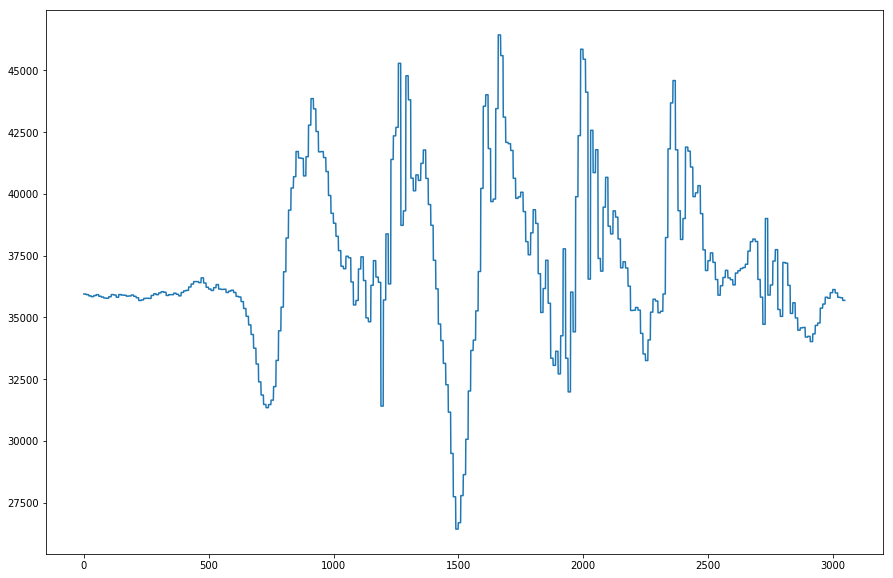

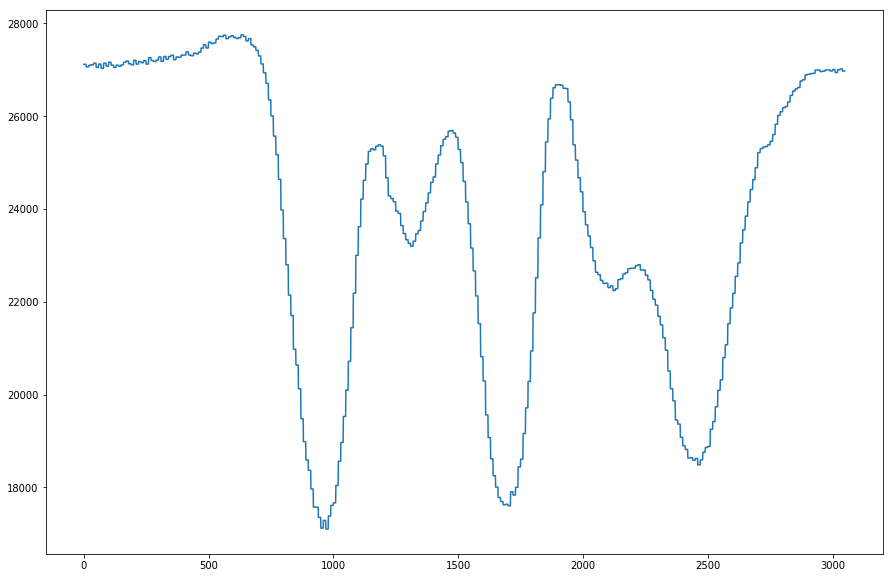

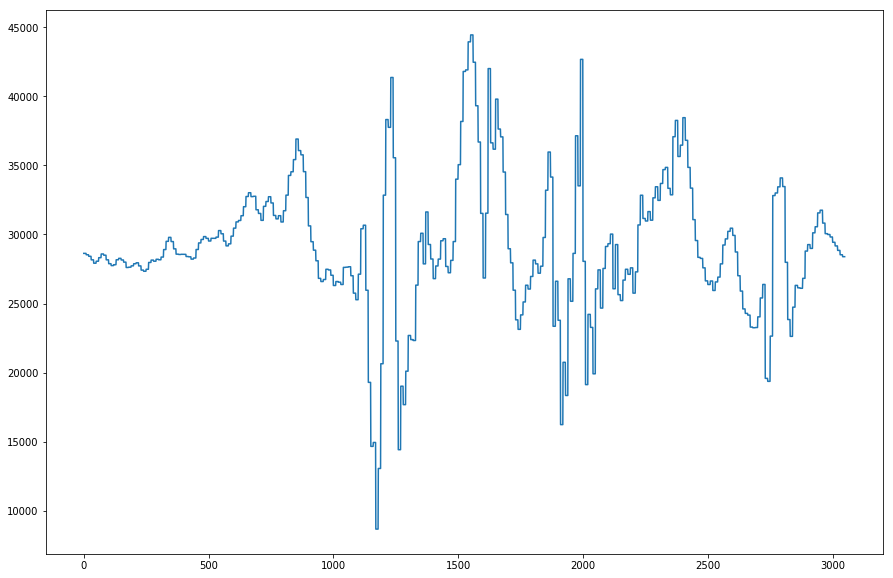

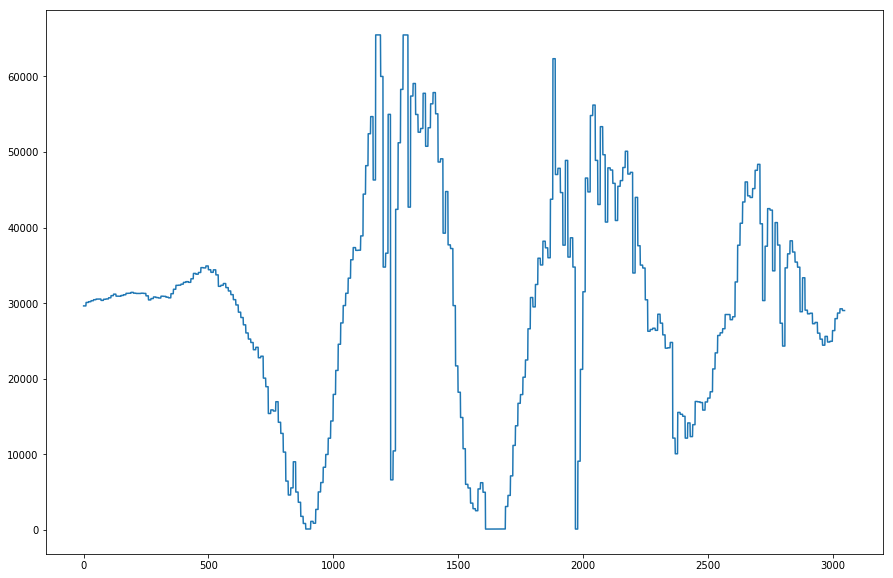

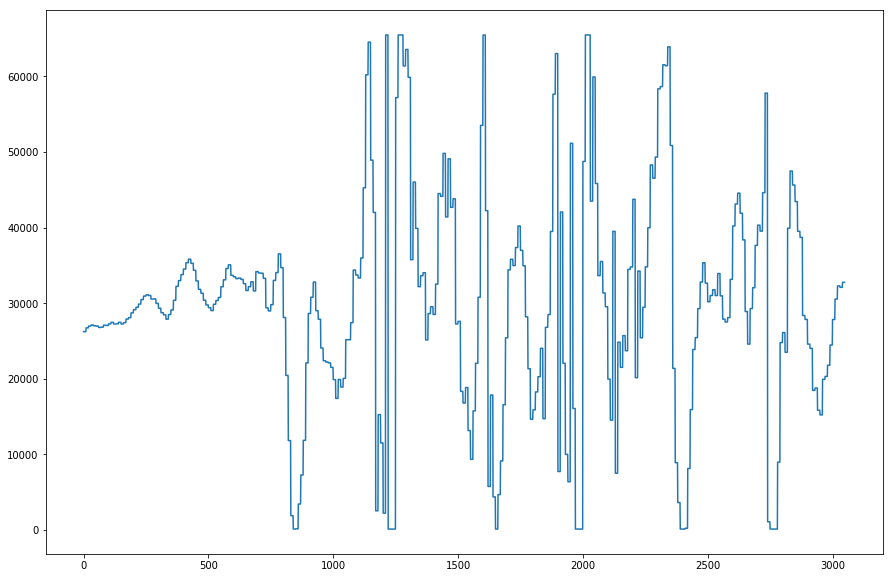

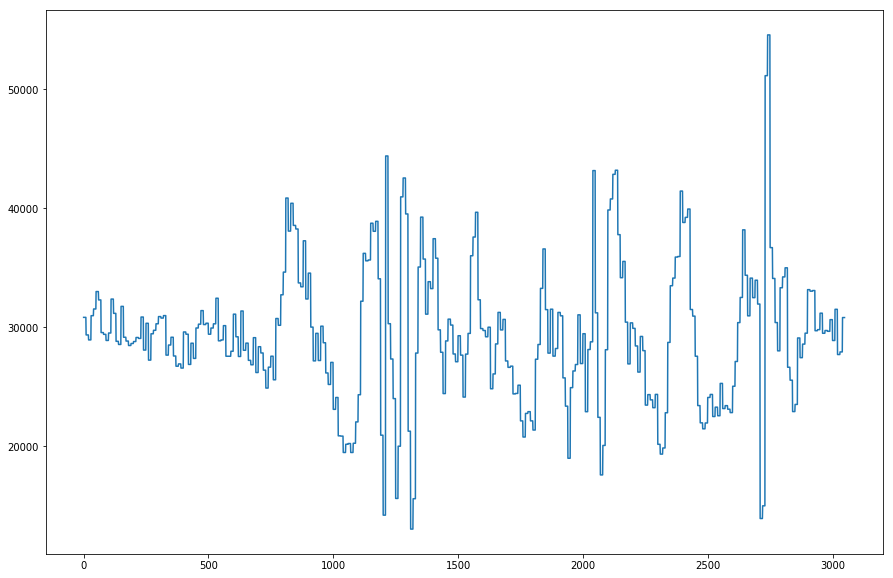

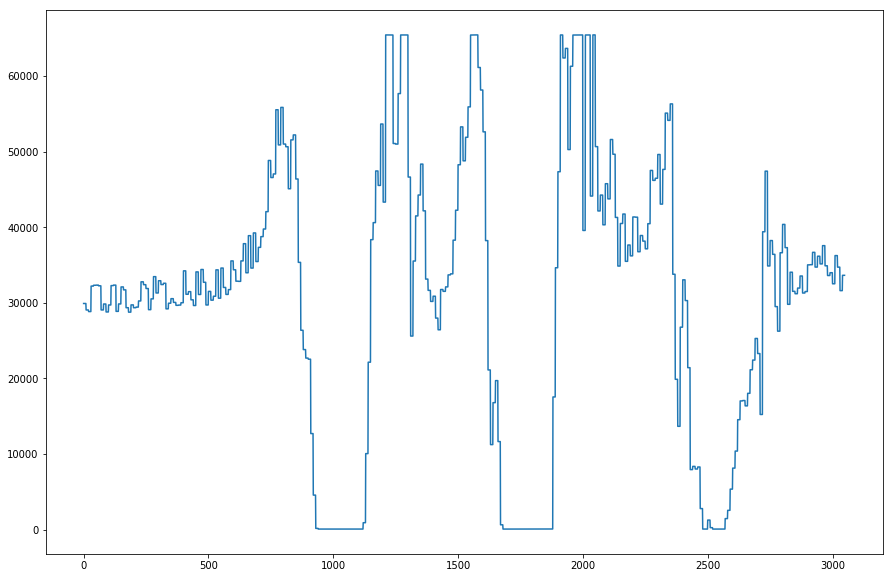

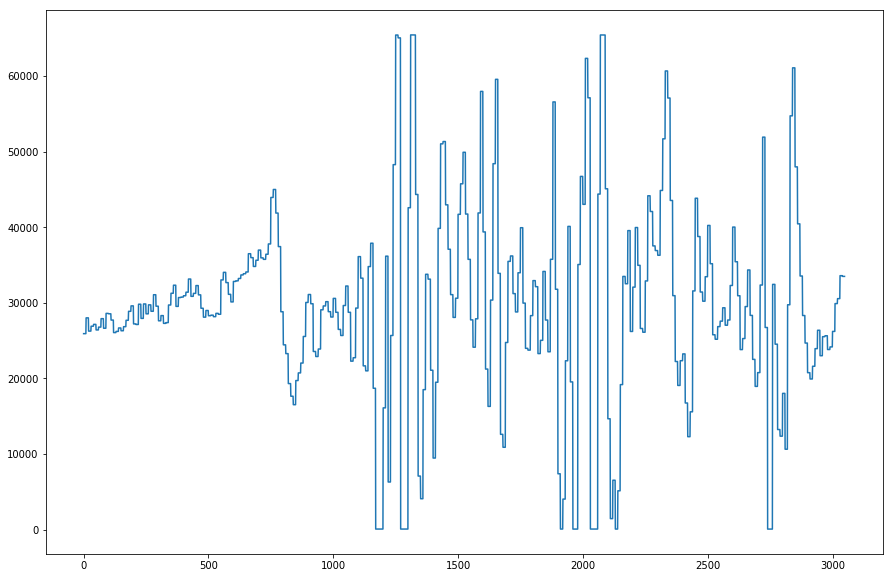

In [9]:
for i in range(19):
    fig = plt.figure()
    fig.set_size_inches(15, 10)
    x = np.arange(mat.shape[0])
    sns.lineplot(x, mat[:, i])
#     sns.lineplot(x, savgol_filter(mat[:, i], 101, 3), color='r')
    peaks, _ = find_peaks(mat[:, i])
#     plt.plot(peaks, mat[peaks, i], c='r')

In [42]:
find_peaks(mat)

ValueError: `x` must have exactly one dimension

In [20]:
from scipy.signal import savgol_filter

/Users/nilavro/miniconda3/envs/analytics/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


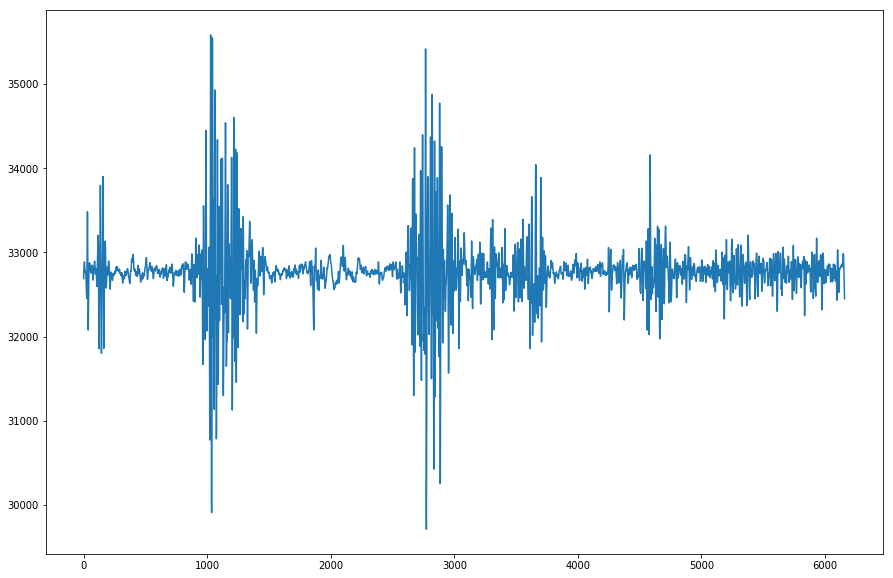

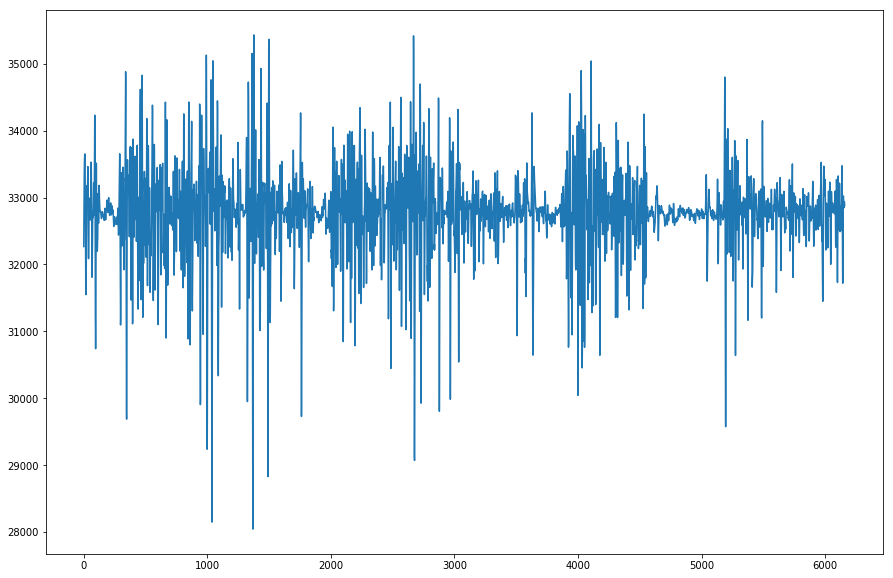

In [24]:
for i in range():
    fig = plt.figure()
    fig.set_size_inches(15, 10)
    x = np.arange(mat.shape[0])
    sns.lineplot(x, savgol_filter(mat[:, i], 11, 3))

In [14]:
data_dir = 'bbdc_2019_Bewegungsdaten/'

In [15]:
mat[99, 7]

NameError: name 'mat' is not defined

In [16]:
data_new = data[data['Label'] != 'lay'].copy()

In [17]:
data_new.shape

(6385, 3)

In [18]:
data.shape

(6401, 3)

In [19]:
train = data_new[(data_new['Subject'] != valid_subs[0])]

In [20]:
data_new.drop(train.index, inplace=True, axis=0)

In [21]:
valid = data_new.sample(frac=1.0)

In [22]:
train.shape

(5946, 3)

In [23]:
valid.shape

(439, 3)

In [24]:
train.to_csv('splits/train.csv', index=False)

In [25]:
valid.to_csv('splits/valid.csv', index=False)

In [26]:
data_new.shape

(439, 3)

In [27]:
train.shape

(5946, 3)

In [28]:
train.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6391, 6392, 6393, 6394, 6395, 6396, 6397, 6398, 6399, 6400],
           dtype='int64', length=5946)

In [29]:
data_new.index

Int64Index([1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765,
            ...
            2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210],
           dtype='int64', length=439)

In [30]:
data = pd.concat((pd.read_csv('bbdc_2019_Bewegungsdaten/train.csv'),
                 pd.read_csv('bbdc_2019_Bewegungsdaten/challenge.csv')))

In [31]:
data.shape

(8139, 3)

In [34]:
subj_stats = {}
for subj in data['Subject'].unique():
    dir_name = f'bbdc_2019_Bewegungsdaten/{subj}/*'
    files = glob.glob(dir_name)
    vals = []
    for file in files:
        vals.append(file2mat(file))
    vals = np.concatenate(vals, axis=0)
    stats = {'min': vals.min(axis=0),
     'avg': vals.mean(axis=0),
     'max': vals.max(axis=0),
     'std': vals.std(axis=0)}
    subj_stats[subj] = stats

In [35]:
subj_stats['Subject01']

{'min': array([0.0000e+00, 1.7616e+04, 1.1000e+01, 1.3645e+04, 7.0000e+00,
        1.0320e+04, 8.6230e+03, 2.3060e+04, 2.9318e+04, 1.4432e+04,
        1.4202e+04, 1.2332e+04, 1.5050e+04, 1.0100e+02, 9.6000e+01,
        9.5000e+01, 9.4000e+01, 9.3000e+01, 9.3000e+01]),
 'avg': array([32772.12759781, 32757.96376791, 32760.14420526, 33105.4872536 ,
        32792.39403033, 33140.04334161, 33299.6337323 , 37155.35330977,
        33148.49351969, 33101.66971557, 36363.6150113 , 35888.32879515,
        25108.33287763, 28951.78536686, 29226.90043699, 29328.55623981,
        29224.56960644, 29282.09444038, 29598.14529842]),
 'max': array([65535., 58745., 65528., 51101., 65535., 52432., 54456., 56281.,
        35624., 55992., 56480., 55822., 29540., 62528., 65488., 65492.,
        65472., 65480., 65476.]),
 'std': array([ 2145.39023493,  1063.79262005,   490.64313095,   990.27628538,
         3113.88637156,  1451.17673379,  2616.01783923,  2009.86493117,
          988.858926  ,  1771.59943114,  2

In [36]:
subj_stats['Subject10']

{'min': array([8.0840e+03, 1.4227e+04, 1.5017e+04, 6.5270e+03, 7.0000e+00,
        8.5310e+03, 1.9034e+04, 8.7400e+03, 2.6752e+04, 1.0360e+04,
        2.0627e+04, 1.3600e+04, 1.9064e+04, 9.9000e+01, 9.4000e+01,
        9.3000e+01, 6.1000e+01, 5.8000e+01, 5.9000e+01]),
 'avg': array([32764.61652994, 33031.28795267, 32782.25656161, 32804.51585036,
        32799.43223207, 33077.95929007, 37157.00777233, 32719.68668851,
        33570.33578834, 32767.56515956, 37148.61868702, 34602.19389914,
        26829.65317997, 28932.60195386, 29309.50255515, 29281.76529064,
        29093.03643097, 29733.69307176, 29511.71639667]),
 'max': array([56647., 57840., 57448., 54536., 65535., 53796., 56464., 55040.,
        35651., 56416., 56512., 56344., 31792., 65488., 65498., 65504.,
        65428., 65437., 65436.]),
 'std': array([  899.23345191,   651.8390046 ,   710.53600343,  1097.93336636,
         2454.4698971 ,  1803.80441284,  2160.70922151,  2559.45191853,
         1418.02870762,  1711.19116438,  1

In [37]:
subj_stats['Subject18']

{'min': array([4.0000e+00, 4.0000e+00, 6.0000e+00, 3.0000e+00, 0.0000e+00,
        1.4636e+04, 1.1344e+04, 8.6000e+03, 2.9989e+04, 8.5820e+03,
        9.0600e+03, 1.1066e+04, 1.8116e+04, 9.6000e+01, 9.3000e+01,
        9.4000e+01, 6.2000e+01, 6.0000e+01, 6.0000e+01]),
 'avg': array([32763.23370427, 32820.39769712, 32781.8416445 , 32763.14119068,
        32822.94534821, 33344.18013253, 37090.5904119 , 34345.87770971,
        31798.79142012, 32519.17316671, 36408.38934702, 35857.39206065,
        27887.65798328, 29734.54651438, 29002.08703403, 29260.79840425,
        29261.77545826, 29289.69950016, 29443.8847104 ]),
 'max': array([65532., 65535., 65509., 65535., 65535., 55324., 56452., 56440.,
        35052., 56048., 56488., 56464., 32252., 65492., 65502., 65496.,
        65436., 65436., 65432.]),
 'std': array([ 2048.93195245,  2624.78153377,  1412.09748761,  2253.4474243 ,
         3235.8818336 ,  1599.87456917,  2183.53149682,  2805.52882188,
          960.1798721 ,  1587.38884823,  2

In [38]:
joblib.dump(subj_stats, 'subj_stats.pkl')

['subj_stats.pkl']

In [138]:
def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y) - 1):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag):i])
            stdFilter[i] = np.std(filteredY[(i-lag):i])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag):i])
            stdFilter[i] = np.std(filteredY[(i-lag):i])
    
    counts = 0
    for i in range(len(signals)-1):
        if signals[i] < signals[i+1]:
            counts += 1
    return counts

In [137]:
result['signals']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0.])

In [160]:
def feature_engineer(mat):
    mat = mat[:, 4:]
    avg = mat.mean(axis=0).reshape(1, -1)
#     min = mat.min(axis=0).reshape(1, -1)
    max = mat.max(axis=0).reshape(1, -1)
    std = mat.std(axis=0).reshape(1, -1)
    mid = np.median(mat, axis=0).reshape(1, -1)
    counts = np.array([thresholding_algo(x, 10, 3.5, 0.53) for x in mat.T]).reshape(1, -1)
#     mo = mode(mat, axis=0)
    return np.concatenate((max, avg, std), axis=1)

In [161]:
def get_subject_data(subject):
    dir_name = f'bbdc_2019_Bewegungsdaten/{subject}/*'
    files = glob.glob(dir_name)
    vals = []
    for file in files:
        print(file)
        vals.append(feature_engineer(file2mat(file)))
    vals = np.concatenate(vals, axis=0)
    return vals, data[data['Subject'] == subject]['Label'].values

In [162]:
sub9 = get_subject_data('Subject09')

bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme243.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme257.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme280.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme294.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme069.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme041.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme055.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme082.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme096.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme109.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme135.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme121.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme337.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme323.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme322.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme336.csv
bbdc_2019_Bewegungsdaten

bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme180.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme194.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme143.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme157.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme037.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme023.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme235.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme221.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme209.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme237.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme223.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme009.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme035.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme021.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme169.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme141.csv
bbdc_2019_Bewegungsdaten

bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme216.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme202.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme028.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme014.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme000.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme148.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme160.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme174.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme438.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme362.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme404.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme410.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme376.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme389.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme388.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme411.csv
bbdc_2019_Bewegungsdaten

bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme338.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme339.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme311.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme305.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme113.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme107.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme098.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme067.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme073.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme259.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme265.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme271.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme267.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme273.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme298.csv
bbdc_2019_Bewegungsdaten/Subject09/Subject09_Aufnahme065.csv
bbdc_2019_Bewegungsdaten

In [163]:
sub17 = get_subject_data('Subject17')

bbdc_2019_Bewegungsdaten/Subject17/Subject17_Aufnahme285.csv
bbdc_2019_Bewegungsdaten/Subject17/Subject17_Aufnahme291.csv
bbdc_2019_Bewegungsdaten/Subject17/Subject17_Aufnahme246.csv
bbdc_2019_Bewegungsdaten/Subject17/Subject17_Aufnahme252.csv
bbdc_2019_Bewegungsdaten/Subject17/Subject17_Aufnahme087.csv
bbdc_2019_Bewegungsdaten/Subject17/Subject17_Aufnahme093.csv
bbdc_2019_Bewegungsdaten/Subject17/Subject17_Aufnahme044.csv
bbdc_2019_Bewegungsdaten/Subject17/Subject17_Aufnahme050.csv
bbdc_2019_Bewegungsdaten/Subject17/Subject17_Aufnahme078.csv
bbdc_2019_Bewegungsdaten/Subject17/Subject17_Aufnahme130.csv
bbdc_2019_Bewegungsdaten/Subject17/Subject17_Aufnahme124.csv
bbdc_2019_Bewegungsdaten/Subject17/Subject17_Aufnahme118.csv
bbdc_2019_Bewegungsdaten/Subject17/Subject17_Aufnahme332.csv
bbdc_2019_Bewegungsdaten/Subject17/Subject17_Aufnahme326.csv
bbdc_2019_Bewegungsdaten/Subject17/Subject17_Aufnahme327.csv
bbdc_2019_Bewegungsdaten/Subject17/Subject17_Aufnahme333.csv
bbdc_2019_Bewegungsdaten

KeyboardInterrupt: 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=3)

In [ ]:
knn.fit(sub9[0], sub9[1])
accuracy_score(knn.predict(sub9[0]), sub9[1])

In [129]:
preds = knn.predict(sub17[0])

In [130]:
accuracy_score(preds, sub17[1])

0.0659090909090909

In [148]:
mat

NameError: name 'mat' is not defined